In [2]:
import pandas as pd

df = pd.read_csv('data/transaction.csv')

print(df.columns)

Index(['Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time betwe

In [3]:
# 상관계수 
corr_matrix = df.corr()

print(corr_matrix['FLAG'].sort_values(ascending=False))

FLAG                                                    1.000000
 ERC20 min val sent                                     0.025364
 ERC20 avg val sent                                     0.025044
 ERC20 max val sent                                     0.025038
 ERC20 total ether sent                                 0.024762
 ERC20 total Ether sent contract                        0.013514
 ERC20 min val rec                                      0.011163
 ERC20 uniq sent token name                             0.009249
 ERC20 avg val rec                                      0.007881
min val sent                                            0.006626
 ERC20 uniq sent addr.1                                -0.003047
total ether balance                                    -0.003229
 ERC20 max val rec                                     -0.004313
 ERC20 total Ether received                            -0.004475
min value sent to contract                             -0.007213
max val sent to contract 

C:\Users\User\AppData\Local\Temp\ipykernel_3932\1806937699.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [4]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

str_cols = df.select_dtypes(include=[object]).columns

le = LabelEncoder()

for col in str_cols:
    df[col] = df[col].astype(str) 
    df[col] = le.fit_transform(df[col])

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['FLAG'])
y = df_imputed['FLAG']

model = RandomForestClassifier(random_state=0)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X.columns[indices[f]], importances[indices[f]]))

 1)  ERC20 most sent token type    0.267229
 2)  ERC20 min val rec             0.106648
 3)  ERC20 min val sent            0.051536
 4) Time Diff between first and last (Mins) 0.047981
 5)  ERC20 uniq sent addr.1        0.046392
 6)  ERC20 total Ether sent contract 0.045866
 7)  ERC20 avg val sent            0.037527
 8)  ERC20 total Ether received    0.035557
 9)  ERC20 max val rec             0.035097
10)  ERC20_most_rec_token_type     0.034511
11)  ERC20 avg val rec             0.028477
12)  ERC20 max val sent            0.024068
13) Avg min between received tnx   0.022408
14) total ether received           0.022194
15)  Total ERC20 tnxs              0.021199
16) total transactions (including tnx to create contract 0.019917
17)  ERC20 total ether sent        0.018897
18) Address                        0.018193
19) Index                          0.014635
20) Unique Received From Addresses 0.012073
21)  ERC20 uniq rec addr           0.009468
22) Received Tnx                   0.009433

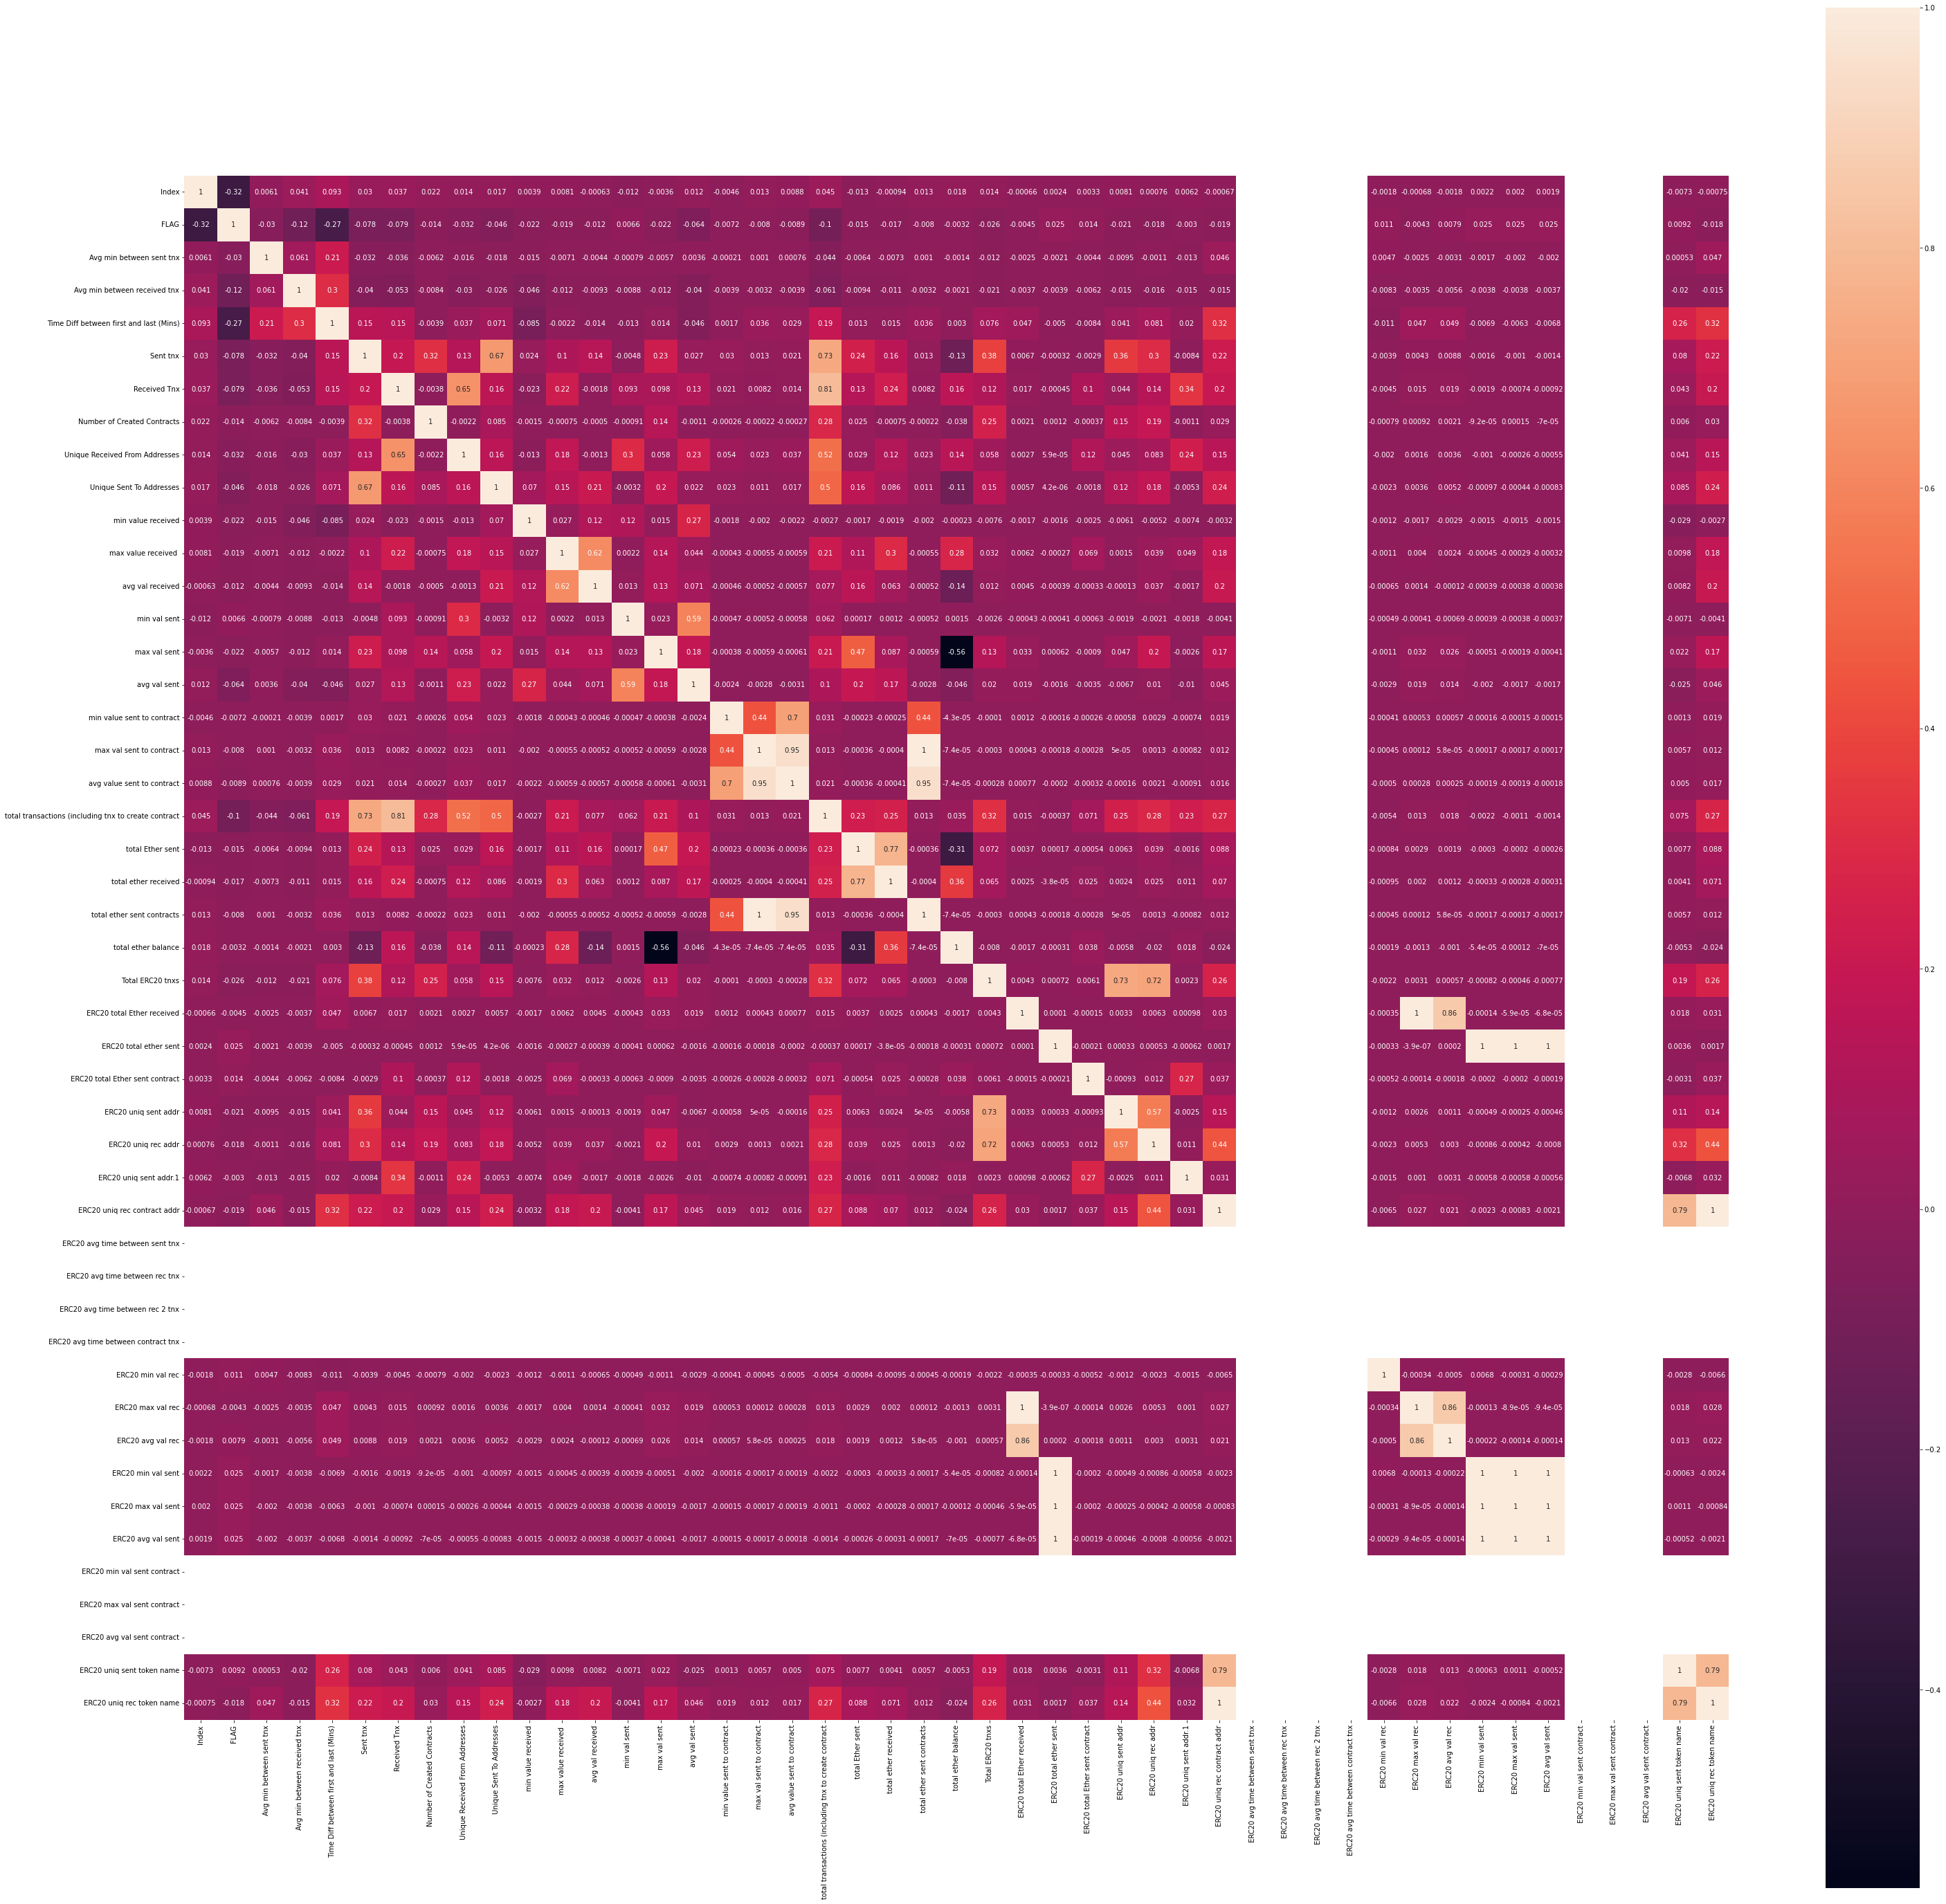

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.show()
